# Fiction Grocery EDA Project

## Project Introduction

Hello my name is George Stimson, a data scientist/analyst who loves to use my 
skills in mathematics and programming to help businesses make better decisions 
to reach their goals. Today I will walk you through an exploratory data analysis 
report I conducted for a grocery store chain called FictionGrocery. 

Ownership of a national grocery chain called FictionGrocery wanted to increase 
revenue in order to improve business operations. The company 
retained me to conduct a thorough analysis of their sales data, develop insights 
into their revenue stream, and provide recommendations to increase net sales. 
I received sales data that included unique sales id, branch and city locations, 
customer types, customer gender, product name and category, 
quantity of products sold, sales tax associated with each sale, and reward 
points for members of the store.

To provide ownership with useful recommendations, I used python and its key 
libraries to analyze and visualize their sales data. For the core analysis 
I used Numpy and Pandas to clean the data, engineer new features, and to extract 
descriptive statistics. For data visualization I used Matplotlib and Seaborn.

## Table of Contents

- [Section 1: Initial Exploration and Data Cleaning](#section-1:-initial-exploration-and-data-cleaning)
    - [Section 1.1: Initial Exploration](#section-1.1:-initial-exploration)
    - [Section 1.2: Data Cleaning](#section-1.2:-data-cleaning)
- [Section 2: Feature engineering](#section-2:-feature-engineering)
- [Section 3: Data Visualizations](#section-3:-data-visualizations)
    - [Section 3.1: Univariate Analysis](#section-3.1:-univariate-analysis)
    - [Section 3.2: Bivariate Analysis](#section-3.2:-bivariate-analysis)
- [Section 4: Recommendations and Conclusion](#section-4-recommendations-and-conlcusion)
    - [Section 4.1: Recommendations](#section-4.1:-recommendations)
    - [Section 4.2: Conclusion](#section-4.2:-conclusion)

<a id="section-1-initial-exploration-and-data-cleaning"></a>

## Section 1: Initial Exploration and Data Cleaning

<a id="section-1-initial-exploration"></a>


#### Section 1.1: Initial Exploration

First we need to conduct two steps to start our analysis:
 - Step 1: Import the required libraries.
 - Step 2: Load the provided data into a pandas dataframe object

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sales_data = pd.read_csv("fiction_grocery_sales.csv")

Our initial steps are now complete. Let us kick off our exploration by checking 
out the data's dimensions, types, count of duplicated records, and its first 10 
records. This will give us a clearer picture of the current state and schema of 
the dataset. 

In [33]:
data_characteristics = (
    f"Data Dimensions: {sales_data.shape}\n",
    f"Duplicate Record Count: {sales_data.duplicated().sum()}\n",
    f"Data Types: \n{sales_data.dtypes}",
)

for characteristic in range(len(data_characteristics)):
    print(data_characteristics[characteristic])

print("\nSample Set:\n")
sales_data.head(10)


Data Dimensions: (1000, 12)

Duplicate Record Count: 0

Data Types: 
sale_id               int64
branch               object
city                 object
customer_type        object
gender               object
product_name         object
product_category     object
unit_price          float64
quantity            float64
tax                 float64
total_price         float64
reward_points       float64
dtype: object

Sample Set:



,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3.0,1.16,17.66,1.0
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10.0,1.93,29.43,0.0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15.0,1.26,19.26,1.0
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5.0,2.73,41.73,0.0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7.0,1.72,26.22,2.0
5,6,A,Chicago,Normal,Male,Shampoo,Stationery,11.24,9.0,7.08,108.24,0.0
6,7,A,Chicago,Normal,Male,Shampoo,Personal Care,10.71,1.0,0.75,NaN,0.0
7,8,B,Los Angeles,Normal,Female,Shampoo,Household,NaN,9.0,11.48,175.55,0.0
8,9,A,Chicago,Member,Female,Apple,Fruits,14.15,NaN,19.81,302.81,30.0
9,10,B,Los Angeles,Member,Male,Shampoo,Fruits,NaN,19.0,24.50,374.48,NaN



Some basic characteristics for the table are listed as follows:
- The dataset has 1000 records and 13 columns.
- No duplicated records are present in the data set
- 7 columns are categorical while the remanining 6 are numerical. All categorical 
columns are objects, while the numerical columns are mostly floating point values
**with one exception of the sale_id column which consist of integers**. 
- Nulls are present in some of the numerical columns. 

With this information, we can now develop a plan for cleaning FictionGroceries
data.

<a id="section-1.2-data-cleaning"></a>

#### Section 1.2: Data Cleaning

##### Cleaning Plan:
- Step 1: Convert columns to proper data types.
- Step 2: Rename and drop unnecessary columns.
- Step 3: Visualize product counts and distributions for all numerical columns.
- step 4: Visualize null counts present in each column.
- Step 5: Visualize distributions with nulls to determine how to fill null values.
- Step 6: Visualize previous null count and new null count after removal. 


For step 1 we will convert all categorical variables from object to string type, numerical types from only floating point numbers to either floating points or integers, and the date column to a datetime object. This will ease up the analysis process in later steps. 


In [34]:
sales_data = sales_data.convert_dtypes()
sales_data.dtypes

sale_id                      Int64
branch              string[python]
city                string[python]
customer_type       string[python]
gender              string[python]
product_name        string[python]
product_category    string[python]
unit_price                 Float64
quantity                     Int64
tax                        Float64
total_price                Float64
reward_points                Int64
dtype: object

For step two in cleaning the data let's start by dropping the sale_id and product 
category column.
We will drop the sale_id column since there is no associated customer name 
column, 
and the values are in order from 1 to the max amount of records. 
We will drop the product category column since the right categories are not 
associated with the products. Examples include the shampoo product under the 
fruits category. 
This can be seen when we viewed the 1st 10 records of the dataset. 

In [35]:
sales_data = sales_data.drop(columns=["sale_id","product_category"], axis=1)

For the purposes of easier data access let’s rename some columns. We will rename the product_name column to products, city_names to cities, and sale_date to date.

In [36]:
new_names = {
    "product_name": "products",
    "total_price": "total",
    "sale_data": "date"
}
sales_data.rename(columns=new_names, inplace=True)

Upon the completion of step 1 and 2 of our cleaning process, we can move onto step 3. Before we visualize our information let's organize our stores and branches into a map for easier data access. This will let us extract insights on a per-city and per-branch basis. Since only 2 branches and 3 cities are present 
we will end up with a 6 key map which stores sub dataframes associated with the branch and city.

In [37]:
product_names = tuple(sales_data.products.unique())
city_names = tuple(sales_data.city.unique())
numerical_columns = tuple(sales_data.select_dtypes(include="number").columns)
branches = ("A","B")
store_map = {}

for city in city_names:
    for branch in branches:
        key = f"{city} {branch}"
        record_filter = (
            (sales_data.city == city) & (sales_data.branch == branch)
        )
        store_map[key] = sales_data.loc[record_filter]

With our store data organized, let's visualize the total product count for each 
store and branch. 

In [38]:
keys = list(store_map.keys())
counts = [int(store_map[key].value_counts().sum()) for key in keys]

def product_count_visualizer(stores, data):
    COLORS = ("#008080", "#228B22", "#191970", "#0047AB", "#2A5D50", "#21421E")
    fig, ax = plt.subplots()
    ax.bar(stores, data, color=COLORS)
    ax.tick_params(axis="x", labelsize=7)
    ax.set_title("Total Product Counts for Stores")
    plt.show()    

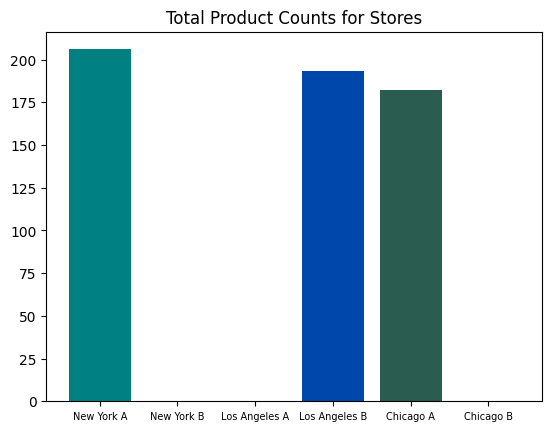

In [39]:
product_count_visualizer(keys, counts)

From this visual we can see that some branches don’t offer any products at all. 
This would mean that the branch column holds no significance in our analysis. 
We can drop this column and shift our analysis to a per-city, per-product basis. 

In [40]:
sales_data = sales_data.drop("branch", axis=1)

After dropping the branch column let's take a look at our datasets dimensions.

In [41]:
print(f"Sales Data Dimensions: {sales_data.shape}")

Sales Data Dimensions: (1000, 9)


We now have a 9 column 1000 record dataset. With some preliminary cleaning 
complete, let us now move onto step 4. We will first visualize the null counts 
in the dataset to determine which columns contain these values, then visualize 
the distributions for each numerical column 
on a per-city, per-product basis. These visuals will give us a better idea on 
how to fill the present null values. 


In [42]:
labels = tuple(sales_data.columns)
values = tuple(sales_data.isnull().sum())

def null_count_visualizer(columns, data):
    
    COLORS = (
    "#003366", "#004466", "#005577", "#006666", "#007755",
    "#118866", "#229977", "#33AA88", "#447799", "#335588",
    "#223366", "#112244"
    )

    fig, ax = plt.subplots()
    ax.barh(data, columns, color=COLORS)
    ax.tick_params(labelsize=10)
    ax.set_title("Null Counts in FictionGrocery Data Set")
    fig.tight_layout()

    plt.show()


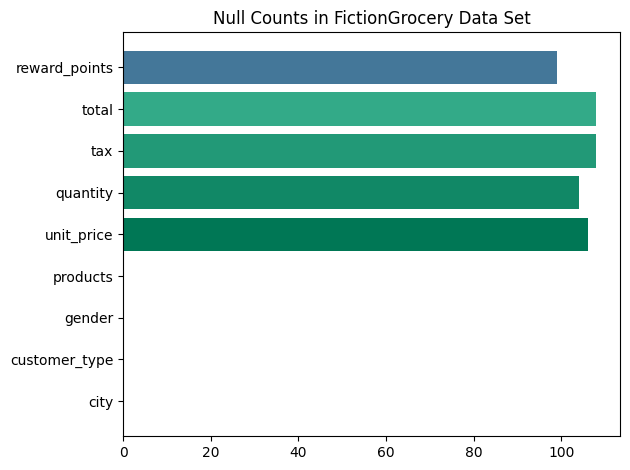

In [43]:
null_count_visualizer(values, labels)

From this bar chart we can see that all nulls are present in all numerical 
columns. Since these columns will be the core of our analysis lets 
visualize the distributions for each city to determine how we will fill these 
values. 

In [44]:
# Function to output distributions of data for each city
def product_distribution_visualizer(cities: tuple, columns: tuple) -> None:
    """Ouputs data distributions for product metrics on a per city basis.
    
    Arguments:
    cities -- tuple of city names
    columns -- tuple of column names
    """
    LABELS=["Shampoo", "Apple", "Orange Juice", "Detergent", "Notebook"]

    fig, ax = plt.subplots(3,5, figsize=(17,17))
    for i in range(len(cities)):
        for j in range(len(columns)):
            city = cities[i]
            column = columns[j]
            record_filter = sales_data.city == city
            sub_set = sales_data.loc[record_filter, ["products",column]]
            sns.kdeplot(sub_set, x=column, hue="products", ax=ax[i, j], fill=True)
            ax[i, j].set_xlabel(f"{city} {column} product distributions")
            ax[i, j].legend(loc="upper right", labels=LABELS)
    plt.tight_layout()

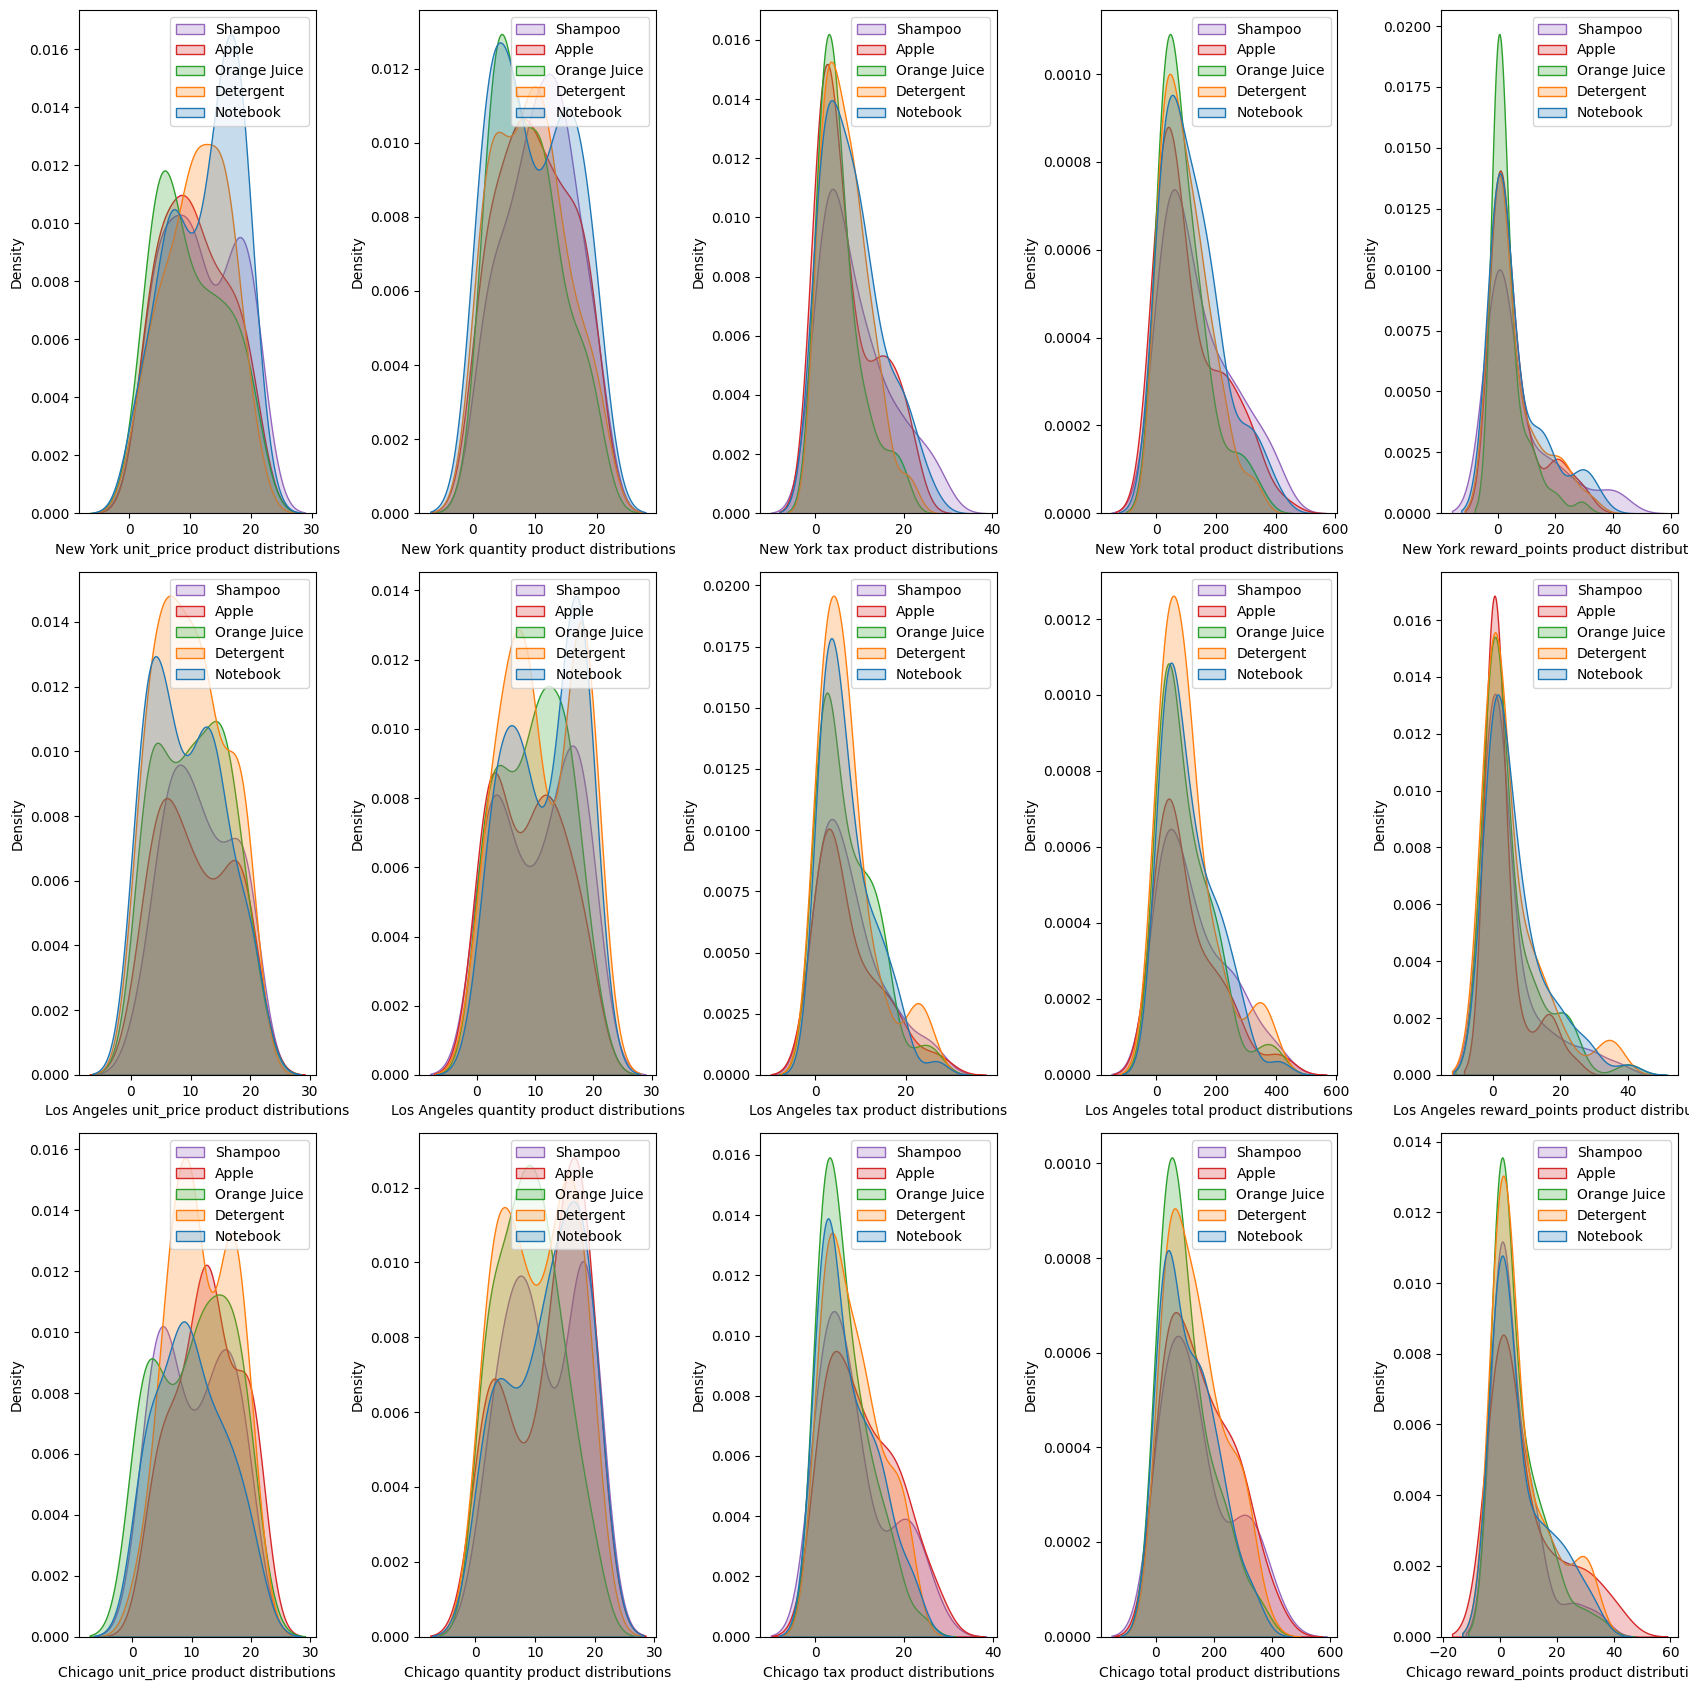

In [45]:
product_distribution_visualizer(city_names, numerical_columns)

From these visuals we can see that certain columns share similar distribution 
structures. Columns associated with **unit_price and quantity** contain a mix of 
distributions ranging from normal to somewhat bimodal. Columns associated with 
**tax, total, and reward_points** display a right skew. These patterns persist in all 
of FictionGroceries locations. 



These patterns can be due to a number of reasons such as presence of nulls, outliers 
,and customer purchasing behavior. To recenter these distributions
we will fill the present null values associated with these columns with a metric. 
For the columns **unit_price and quantity** we will fill the null values with the 
**mean of their data**. For the **tax, total, and reward_points** columns we will fill 
the nulls with **the data’s median** due to the skew of the data. 

To complete this task we will create a function that fills the nulls in 
each column with the chosen metrics. Once this function is complete we will then
create another function that visualizes the null counts before and after the
null-filling operation. This will help verify that our null-filling
process was completed properly. 

In [46]:
def null_filler(cities: tuple, columns: tuple, products: tuple) -> None:
    """Function that fills nulls on per-city, per-product basis.
    
    Arguments:
    cities -- tuple of city names
    columns -- tuple of column names
    products -- tuple of product names
    """ 
    GROUP_1 = {"unit_price", "quantity"}
    GROUP_2 = {"tax", "total", "reward_points"}
    for city in cities:
            for product in products:
                for column in columns:
            
                    filter_1 = (
                                (sales_data.city == city) 
                                & (sales_data.products == product) 
                            )
                    filter_2 = (filter_1 & sales_data[column].isnull())
                    
                    if column in GROUP_1:
                        mean = int(sales_data.loc[filter_1, column].mean())
                        sales_data.loc[filter_2, column] = mean
                    elif column in GROUP_2:
                        median = int(sales_data.loc[filter_1, column].median())
                        sales_data.loc[filter_2, column] = median

In [47]:
def null_filler_visualizer() -> None:
    """Function which visualizes null count for pre and post null removal."""
    null_count = sales_data.isnull().sum().sum()
    non_null_count = len(sales_data) - null_count
    LABELS = "null count", "non null count"
    COLORS = ("#F44336", "#4CAF50")
    
    fig, ax = plt.subplots(1,2)
    ax[0].pie([null_count, non_null_count], labels=LABELS, autopct="%1.1f%%",
              shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
              colors=COLORS)
    ax[0].set_title("Pre Null Replacement")
    null_filler(city_names, numerical_columns, product_names)
    null_count = sales_data.isnull().sum().sum()
    non_null_count = len(sales_data) - null_count
    ax[1].pie([null_count, non_null_count], labels=LABELS, autopct="%1.1f%%", 
              shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
              colors=COLORS)
    ax[1].set_title("Post Null Replacement")
    fig.tight_layout()
    plt.show()

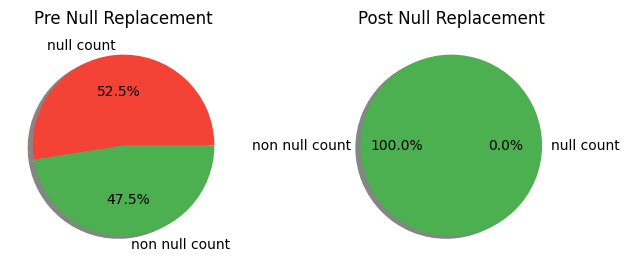

In [48]:
null_filler_visualizer()

From the above output we can see our function has successfully replaced the null 
values with the mean and median for each column grouping. Imputing these metrics 
into their respective groups helps with recentering the data while maintaining 
its original integrity. This adjustment allows us to extract key insights, since 
null values no longer have an influence on the distributions. This will allow us 
to provide quality business recommendations to FictionGroceries ownership. With 
our data cleaning complete we can now move onto feature engineering.  

<a id="section-2-feature-engineering"></a>

### Section 2: Feature Engineering    

##### Plan for Feature Engineering

Since our task is to provide helpful recommendations so FictionGrocery can 
increase total revenue, we need to add some features to the data. The current 
dataset provides no columns that display gross profit per sale, and net profit 
per sale. Adding these features will help us extract unseen information about 
their sales. To determine gross profit per sale, we will create a new column 
**called gross_profit_sales**. 
The values of this column will be the **unit_price column 
multiplied by the quantity column**. To determine net profit per sale we will 
create a column **called net_profit_sales**. The values in this column will be 
found by **subtracting the sum of the tax and reward_points columns from the 
gross_profit_sales column**.We sum the tax and reward_points column because 
we assume that one reward point is equal to 1 dollar of purchasing power in the 
store.

In [49]:
gross_profit = sales_data["unit_price"] * sales_data["quantity"]
sales_data = sales_data.assign(gross_profit_sales=gross_profit)

net_profit = (
    sales_data["gross_profit_sales"] 
    - (sales_data["tax"] + sales_data["reward_points"])
)

print()

sales_data = sales_data.assign(net_profit_sales=net_profit)

Since we created our new columns, let's verify they are in the 
dataset.

In [50]:
sales_data.head(10)

,city,customer_type,gender,products,unit_price,quantity,tax,total,reward_points,gross_profit_sales,net_profit_sales
0,New York,Member,Male,Shampoo,5.5,3,1.16,17.66,1,16.5,14.34
1,Los Angeles,Normal,Female,Notebook,2.75,10,1.93,29.43,0,27.5,25.57
2,New York,Member,Female,Apple,1.2,15,1.26,19.26,1,18.0,15.74
3,Chicago,Normal,Male,Detergent,7.8,5,2.73,41.73,0,39.0,36.27
4,Los Angeles,Member,Female,Orange Juice,3.5,7,1.72,26.22,2,24.5,20.78
5,Chicago,Normal,Male,Shampoo,11.24,9,7.08,108.24,0,101.16,94.08
6,Chicago,Normal,Male,Shampoo,10.71,1,0.75,131.0,0,10.71,9.96
7,Los Angeles,Normal,Female,Shampoo,10.0,9,11.48,175.55,0,90.0,78.52
8,Chicago,Member,Female,Apple,14.15,9,19.81,302.81,30,127.35,77.54
9,Los Angeles,Member,Male,Shampoo,10.0,19,24.5,374.48,0,190.0,165.5


With the above output we can verify our new features have been added to the data set. 
The new features of gross/net sales will allow us to uncover new sales insights for FictionGroceries operations. Some examples of these insights are the purchasing behavior of customers, seasonal trends in sales for certain products, and highest to lowest performing stores. With these features added let’s delve into the visual analysis of FictionGroceries sales.

<a id="section-3-data-visualizations"></a>

### Section 3: Data Visualizations

Upon completing feature engineering, we can now extract new insights in the data 
with the aid of visuals. This section will perform univariate and bivariate 
analysis on the data. The univariate analysis will visualize the contribution 
of all products to total net and gross profit per store. The bivariate analysis 
will visualize the count of customer type based on gender per store, the 
contribution of customer type to total net profit per store, and the correlations 
between sales metrics for all stores. These visuals will aid us in crafting 
ideal business recommendations for FictionGroceries management. 

<a id="section-3.1-univariate-analysis"></a>

##### Section 3.1: Univariate Analysis

To conduct our univariate analysis for FictionGrocery, we will start by 
visualizing the contribution of each product to total gross and net profit 
per store. These contributions will be visualized using a pie chart. A pie chart 
will provide a clear picture of the percentage contribution each product has on total profitability per store. 

In [51]:
def gross_and_net_contribution_extractor(cities: tuple, products: tuple) -> dict:
    profit_data = {}
    gross_profit_contributions = {}
    net_profit_contributions = {}
    gross_numbers = []
    net_numbers = []
    for city in cities:
        for product in products:
            record_filter_1 = ((sales_data.city == city)
                             &(sales_data.products == product))
            record_filter_2 = ((sales_data.city == city)
                             &(sales_data.products == product))
            
            gross = sales_data.loc[record_filter_1, "gross_profit_sales"].sum()
            net = sales_data.loc[record_filter_2, "net_profit_sales"].sum()
            
            gross_numbers.append(gross)
            net_numbers.append(net)
        
        gross_profit_contributions[f"{city}"] = gross_numbers
        net_profit_contributions[f"{city}"] = net_numbers

        gross_numbers = []
        net_numbers = []

    profit_data["gross"] = gross_profit_contributions
    profit_data["net"] = net_profit_contributions

    return profit_data

In [ ]:
def gross_and_net_contribution_visualizer(cities: tuple, products: tuple) -> None:

    data = gross_and_net_contribution_extractor(cities, products)
    COLORS = ('#48C9B0', '#7D3C98', '#C0392B', '#5DADE2', '#F39C12')
    profit_data = []
    
    fig, ax = plt.subplots(2,3, figsize=(8,8))
    for i in range(2):
        for j in range(3):
            city = cities[j]
            # Conditional serves the purpose of identifying gross and net profit
            if i == 0:
                profit_data = data["gross"][city]
                gross_profit = round(sum(profit_data),2)
                ax[i,j].pie(profit_data, labels=products, 
                            colors=COLORS, autopct="%1.1f%%", 
                            textprops={"fontsize": 6})
                ax[i,j].set_title(
                    f"Gross Profit Contribution for {city}", fontsize=8
                )
                ax[i,j].set_xlabel(
                    f"Gross Profit for {city}: ${gross_profit}", fontsize=7
                )

            else:
                profit_data = data["net"][city]
                net_profit = round(sum(profit_data),2)
                ax[i,j].pie(profit_data, labels=products, colors=COLORS, 
                autopct="%1.1f%%", textprops={"fontsize": 6})
                ax[i,j].set_title(
                    f"Net Profit Contribution for {city}", fontsize=8
                )
                ax[i,j].set_xlabel(
                    f"Net Profit for {city}: ${net_profit}", fontsize=7
                )


    plt.subplots_adjust(hspace=0) 
    fig.suptitle(
        "Gross and Net Profit Percentage contributions for Products Per Store"
    ) 
    fig.tight_layout()

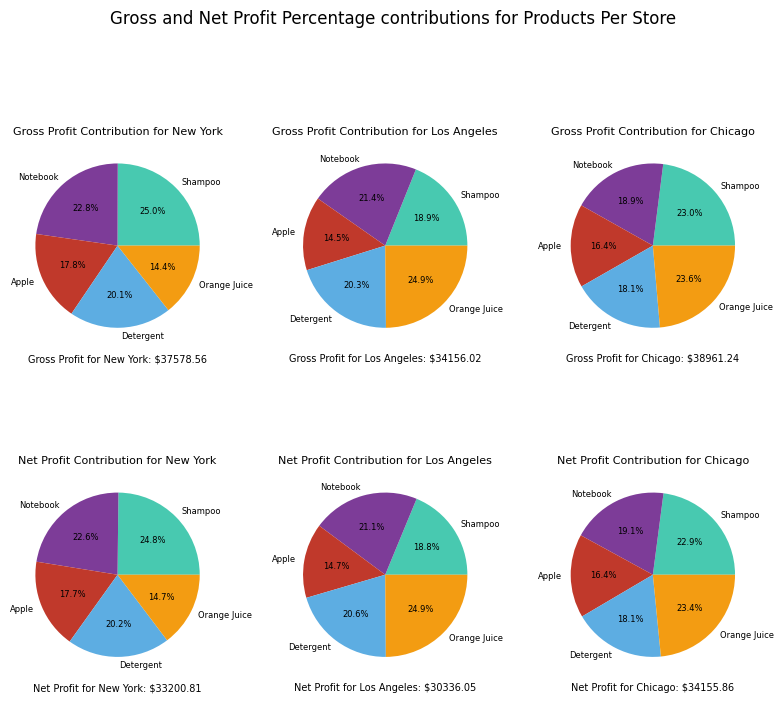

In [53]:
gross_and_net_contribution_visualizer(city_names, product_names)

From the above output we can see that the percentage contribution to total gross and net profit for FictionGroceries stores varies. Some products have similar percentage contributions, while others don’t. Shampoo has the highest percentage contribution to total gross and net profit for all stores. Its contribution ranges from 19% to 25%. Apples is the only product that has an almost uniform percentage contribution per store. Its contribution ranges from 15% to 16%, and it’s also the lowest contributor to total gross and net profit for all stores. All other products vary in their contribution percentages. 

We can also identify which stores contribute the most to total gross and net profit of FictionGrocery. The store which contributes the highest overall gross and net profit is the Chicago location, while the store that contributes the lowest is the Los Angeles location. The variation and gross and net profit product contributions is very low. Variations occur in the ranges of tenth of a percent. This is because the only expenses given to us in this data set is the sales tax and rewards points which only applies to customers with member status. If more expense data was present we would be able to calculate more accurate gross and net profit metrics. 


<a id="section-3.2-bivariate-analysis"></a>

##### Section 3.2: Bivariate Analysis

Upon completion of our univariate analysis, we can now transition to conduct bivariate analysis on the provided data. We will visualize the count of member types based on gender in all of FictionGroceries locations, the contribution of each customer type to total net profit per store, and the correlations between all metrics that contribute to product sales. 


First we will visualize customer type based on gender for each store. We will use a count plot to visualize these relationships. This visual will give us a clear picture of the demographic breakdown of our customers. 

In [54]:

def gender_member_count_visualizer(cities: tuple) -> None:
    COLORS = ["#4CAF50", "#2196F3"]
    fig, ax = plt.subplots(3, figsize=(8,8))
    print("Failed")
    for i in range(len(cities)):
        city = cities[i]
        record_filter = (sales_data.city == city)
        data = sales_data.loc[record_filter]
        ax[i].set_xlabel(f"{city} Customer Status Gender Distribution per Store")
        sns.countplot(data,x="gender",hue="customer_type", ax=ax[i], palette=COLORS)
        ax[i].set_xticks([0,1])
        ax[i].set_xticklabels(["Male", "Female"])
        ax[i].legend(["Member", "Normal"])
    fig.suptitle("Count of Customer Type for Gender Per Store")
    fig.tight_layout()

Failed


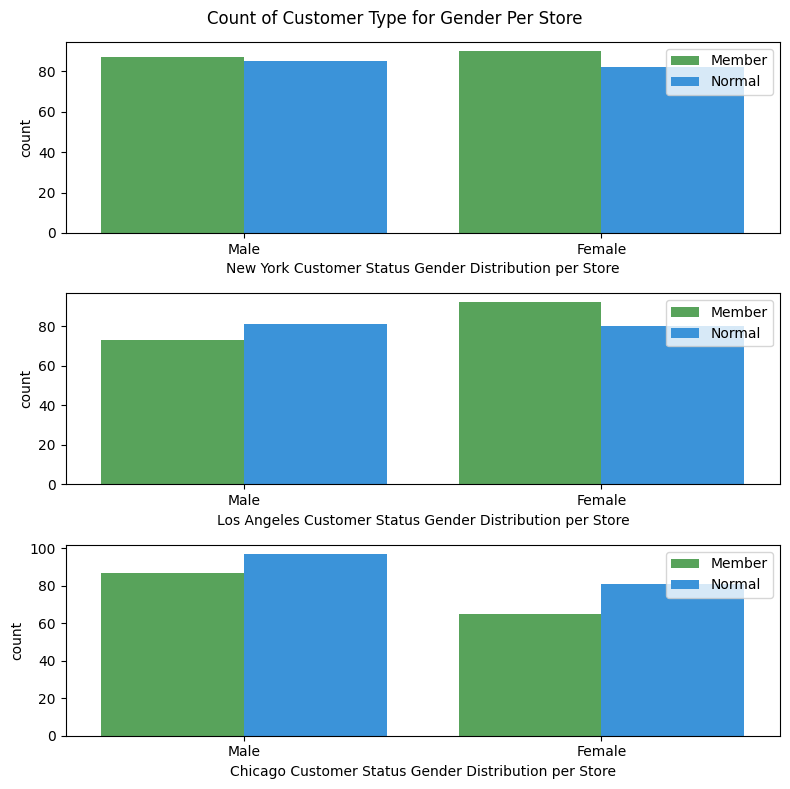

In [55]:
gender_member_count_visualizer(city_names)

The above visual uncovers new insights about the demographics of FictionGroceries customers. Not taking store location into account we can identify an almost even split in member status regardless of gender. This macro view does not transition to a per store basis since each store location has a unique customer breakdown. The New York customer base tends to hold member status regardless of gender. Los Angeles male customers tend to hold non member status while women tend to hold member status. Chicago's customer base is an inverse of New York’s because all customers tend to hold non member status. 


With a clear understanding of customer demographics we can now visualize the contribution of customer type to total net profit per store. To visualize these contributions we will use a barplot. 


In [56]:
def member_status_profit_contribution_visualizer(cities: tuple) -> None:
    COLORS = ["#4CAF50", "#2196F3"]
    fig, ax = plt.subplots(1,3, figsize=(8,8))
    for i in range(len(cities)):
        COLORS = ["#4CAF50", "#2196F3"]
        city = cities[i]
        record_filter = (sales_data.city == city)
        data = sales_data.loc[record_filter]
        sns.barplot(data, x="customer_type", y="net_profit_sales", 
                    estimator="sum", errorbar=None, ax=ax[i], 
                    hue="customer_type", palette=COLORS)
        ax[i].set_xlabel(f"{city}")
        ax[i].set_ylabel("Net Profit Sales")
        ax[i].set_xticks([0,1])
        ax[i].set_xticklabels(["Member", "Normal"])
    fig.suptitle("Net Profit Sales Contribution for Customer Type Per Store")
    fig.tight_layout()

        # Extract net profit
        # display net profit per store based on a stacked bar chart
    

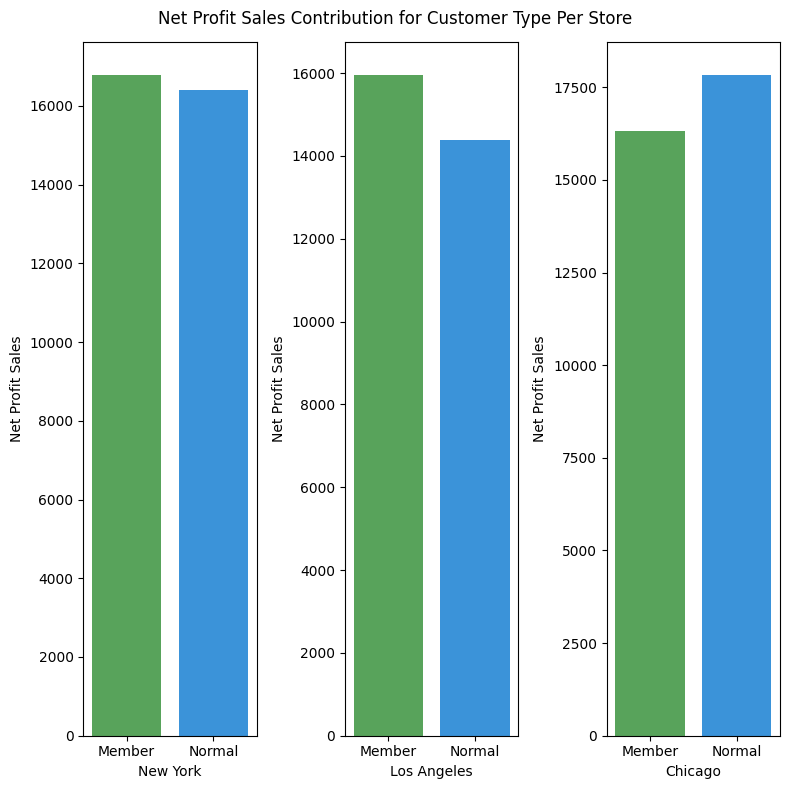

In [57]:
member_status_profit_contribution_visualizer(city_names)

The above visual gives us a clear picture on what customer type contributes the most to total profit for each store. Customers with member status in the New York and Los Angeles locations contribute the most to total net profit, while customers in the Chicago location with non member status are the highest contributors. This is interesting since it somewhat mirrors the demographic distributions, hinting at a possible relationship between customer demographics and profit contributions. 


With a clear understanding of which customer type contributed the most to total net profits per store, we can now visualize the relationships between columns associated with product sales. To visualize these relationships we will use a heatmap. 

In [58]:
def product_metric_correlation_visualizer(target_columns: tuple) -> None:
    columns = list(target_columns)
    numerical_data = sales_data[columns]
    corr = numerical_data.corr()
    sns.heatmap(corr, annot=True, cmap="crest")
    plt.title("Correlation Coefficients for Columns Associated with Product Sales")

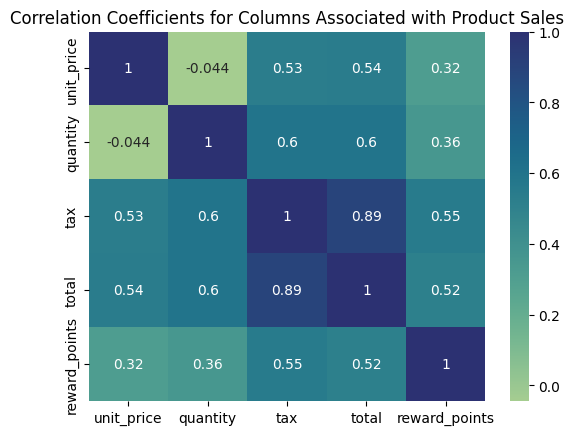

In [30]:
product_metric_correlation_visualizer(numerical_columns)

The above visual provides us with some key insights for correlations between columns associated with product sales. The columns which have the highest correlations are the tax and total column with an r value of 0.95. This makes sense since higher purchase amounts lead to higher sales tax. 

Another key insight is the correlation value for the columns tax/ reward_points and total/ reward_points. The r-value for these column pairs is approximately 0.55, which shows a somewhat strong correlation. This correlation could lead to insights into the purchasing behavior of FictionGroceries customers who have member status. Members who belong to other stores utilize reward points to obtain a discount on their purchase total for the sake of saving money. When purchase totals are high sales tax tends to increase regardless of the presence of reward points. This is not proven for FictionGroceries customer base, in order to prove this possible connection additional testing will be required. 

Upon the completion of our visuals for univariate and bivariate analysis, we can now move to the next section. In our next section we will provide FictionGroceries management with some business recommendations based on our findings. 

<a id="section-4-recommendations-and-conclusion"></a>

### Section 4: Recommendations and Conlcusion

<a id="section-4.1-recommendations"></a>

##### Section 4.1: Recommendations

Profit Increase Recommendations: 
- FictionGroceries Los Angeles location contributes the lowest to total net and gross profit.Reasons for this lack are not clear due to the limitations of the provided data. Some recommendations for  profitability are to increase stock in items that contribute the most to profitability, while reducing stock of items that contribute the least. This will save the store money, and lead to a possible higher turnover rate of products since more popular products are in stock. This remains an inference due to the limitations of the available data. 

Marketing Recommendations: 
- Based on our findings, customer status varies per store. To increase customer experience. FictionGroceries can conduct targeted ad campaigns at customers who contribute the most to the store's profitability. This means offering special promotions for customers who hold non member status vs offering more reward points for customers who hold member status. 
	
Modeling Recommendations:
- To uncover deeper insights within their data, we recommend FictionGroceries management develop predictive models to better understand customer purchasing behavior. These models will offer deeper insights than basic data analysis. Possible modeling approaches that could be utilized are regression for purchasing patterns, time series modeling for seasonal trends, and ensemble methods to predict membership signups. To conduct modeling more data will be required in the future. 


<a id="section-4.2-conclusion"></a>

##### Section 4.2: Conclusion

Throughout this exploratory data analysis project, we completed several key steps. We first cleaned and optimized the dataset provided to us by FictionGroceries management. In our data cleaning section we converted data types to their proper format, and filled in missing values. We then added new features to the dataset such as gross and net profit per sale. With these new features we conducted univariate and bivariate analysis with the aid of visuals. With new insights extracted from our analysis we then provided ownership with recommendations on how to further improve and explore their business. This concludes the exploratory data analysis project. 